In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Add these imports at the top
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("pp_train.csv")
features = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages','totalVideos', 'totalCredits', 'criticReviewsTotal', 
               'awardNominationsExcludeWins','numRegions', 'userReviewsTotal']]

df_num = features.values

X = df_num.copy()
X = np.log1p(X)

# z-score, fit and then transform
scaler = StandardScaler()   #inizialize the standard scaler
scaler.fit(X) #fit the scaler on the data; x è la numpy matrix of the dataset
X_z_scal = scaler.transform(X) #transform to have the scaled version


# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X) #fit e scaler in una riga sola

X_scal = X_z_scal

#dbscan = DBSCAN(eps=2, min_samples=22, metric="euclidean")
dbscan = DBSCAN(eps=1.98, min_samples=11, metric="euclidean")
#dbscan = DBSCAN(eps=1.9, min_samples=11, metric="euclidean")
#dbscan = DBSCAN(eps=2, min_samples=11, metric="euclidean")

dbscan.fit(X_scal)

DBSCAN(eps=1.98, min_samples=11)

In [25]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([  799, 14537,  1095], dtype=int64))

C:\Users\noemi\AppData\Local\Temp\ipykernel_21868\1293610832.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=c, alpha=0.5, label=f'Cluster {l}')


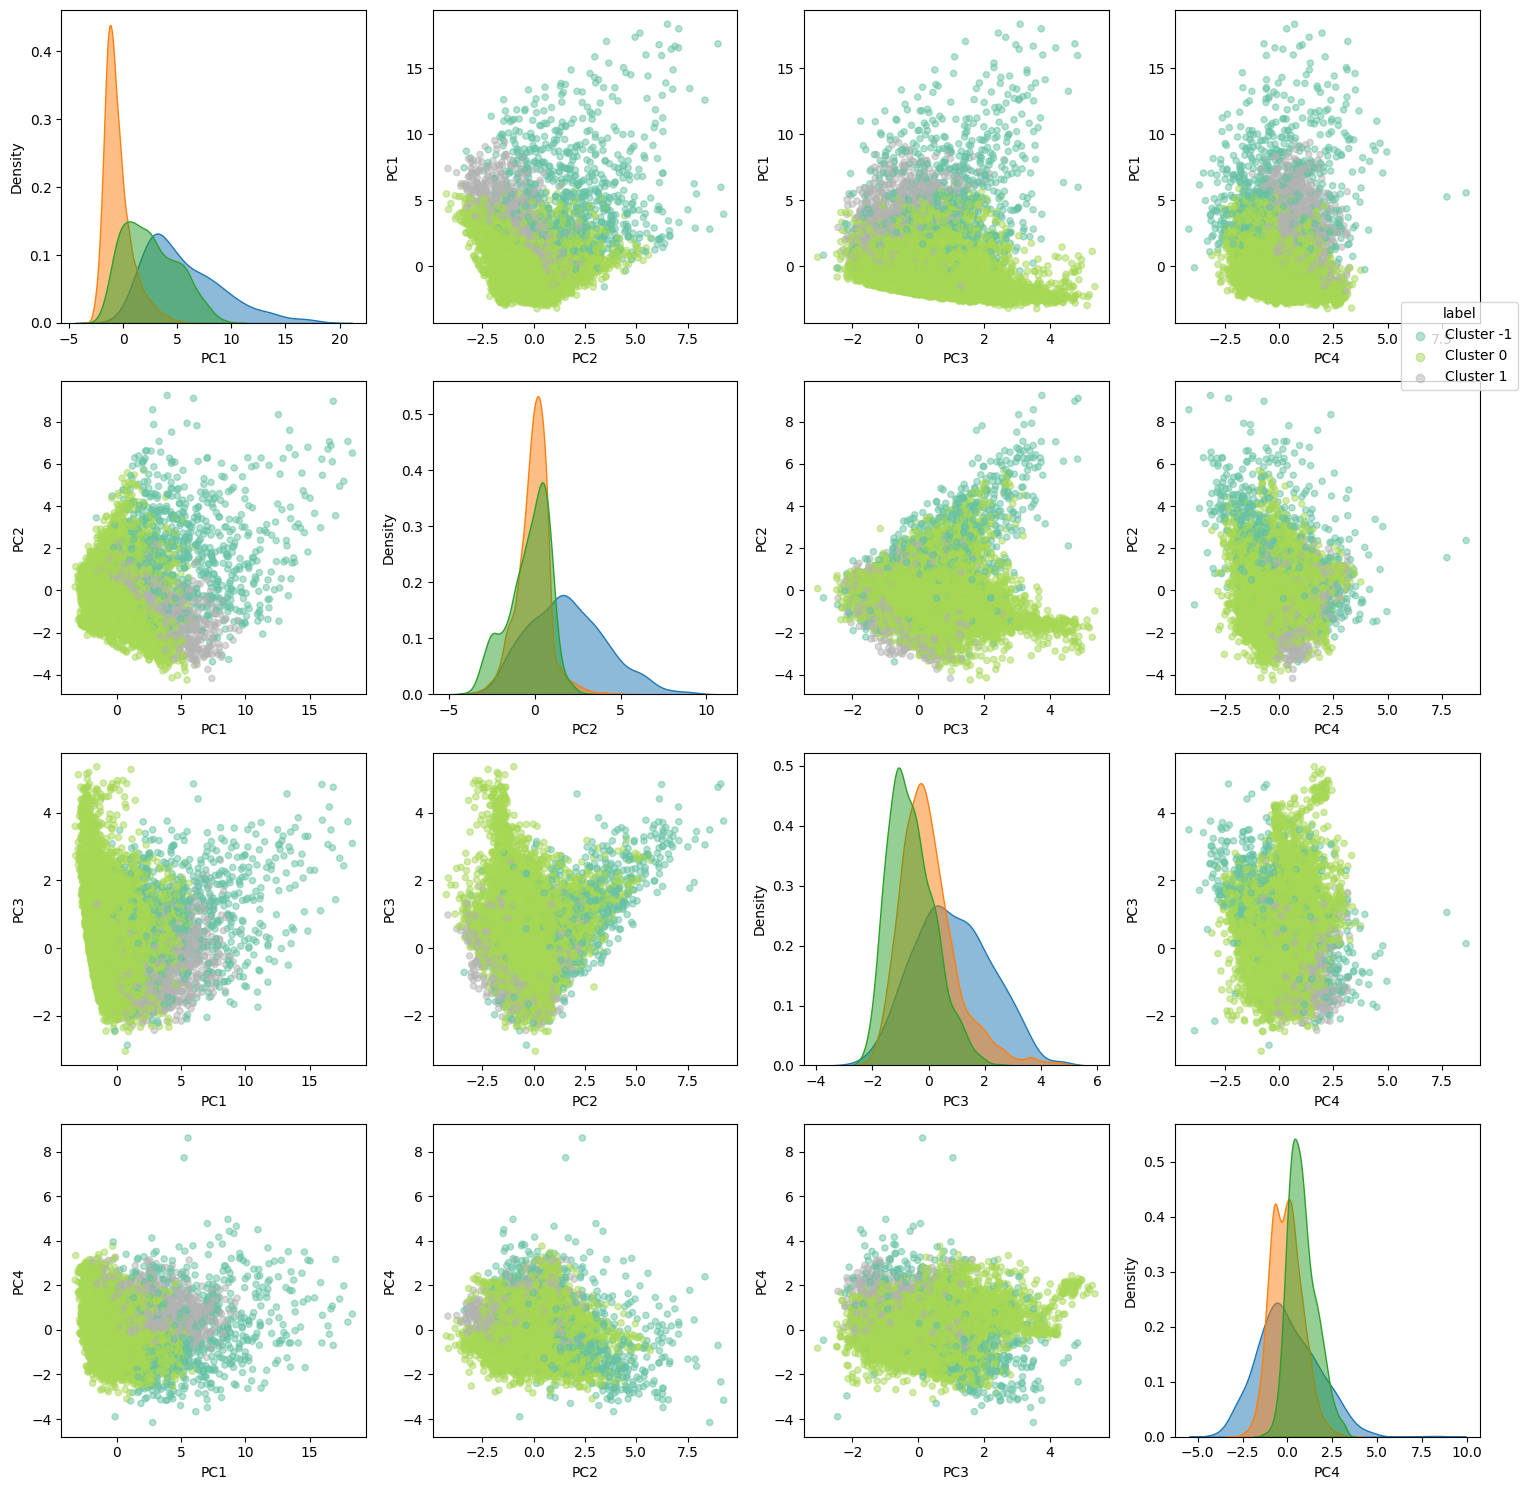


Explained variance ratios:
PC1: 0.430
PC2: 0.123
PC3: 0.105
PC4: 0.083


In [26]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scal)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Create labels for each axis
pc_labels = [f'PC{i+1}' for i in range(4)]

# Plot each combination
for i in range(4):
    for j in range(4):
        if i != j:
            # Scatter plot
            axes[i, j].scatter(X_pca[:, j], X_pca[:, i], 
                             c=dbscan.labels_, cmap='Set2',
                             alpha=0.5, s=20)
            axes[i, j].set_xlabel(pc_labels[j])
            axes[i, j].set_ylabel(pc_labels[i])
        else:
            # Density plot
            for label in np.unique(dbscan.labels_):
                sns.kdeplot(data=X_pca[dbscan.labels_ == label, i],
                          ax=axes[i, i], fill=True,
                          alpha=0.5)
            axes[i, i].set_xlabel(pc_labels[i])
            axes[i, i].set_ylabel('Density')

# Add legend
handles = [plt.scatter([], [], c=c, alpha=0.5, label=f'Cluster {l}')
           for l, c in zip(np.unique(dbscan.labels_),
                          plt.cm.Set2(np.linspace(0, 1, len(np.unique(dbscan.labels_)))))]
fig.legend(handles=handles, title='label', bbox_to_anchor=(1.02, 0.8))

# Adjust layout
plt.tight_layout()
plt.show()

# Print explained variance ratios
print("\nExplained variance ratios:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f}")